In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [307]:
df = pd.read_csv('resources/data_interpolated.csv')
# find numeric columns in df
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
allowed_columns = numeric_columns.copy()
allowed_columns.remove('Year')
allowed_columns.remove('SalesTotal')
allowed_columns.remove('MedianListPrice')

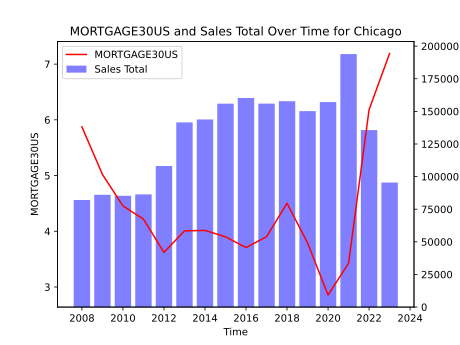

In [308]:
import pandas as pd
import matplotlib
# Ensure matplotlib does not use any Xwindows backend.
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def plot_bar_and_line( city = 'United States', col='Chicago'):  # Renamed function
    df = pd.read_csv('resources/data_interpolated.csv')
    allowed_columns = df.select_dtypes(include='number').columns.tolist()
    allowed_columns.remove('Year')
    allowed_columns.remove('SalesTotal')
    allowed_columns = set(allowed_columns)
    if col not in allowed_columns:
        raise ValueError(f'Invalid value for col. Allowed values are {allowed_columns}')
    df = df[df['CityName'] == city]
    df = df[['Date', 'SalesTotal', col]]
    df[col] = df[col].bfill()
    df.dropna(subset=['SalesTotal'], inplace=True)

    # Convert 'Date' to datetime and set it as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
    df = df.resample('Y').agg({'SalesTotal': 'sum', col: 'mean'})

    # Plot the data
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # Bar plot
    bar = ax2.bar(df.index.year, df['SalesTotal'], color='blue', zorder=0, alpha=.5)

    # Line plot
    line, = ax1.plot(df.index.year, df[col], color='red', zorder=1)

    # Set labels and title
    ax1.set_xlabel('Time')
    ax1.set_ylabel(col)
    ax2.set_ylabel('Sales Total')
    plt.title(col+ ' and Sales Total Over Time for ' + city)

    # Add legends
    plt.legend([line, bar], [col, 'Sales Total'])

    # Move the line plot to the front
    ax1.set_zorder(ax2.get_zorder() + 1)
    ax1.patch.set_visible(False)
    plt.savefig('static/bar_and_line_plot.svg')

    plt.close()

if __name__ == '__main__':
    # Example usage
    city = 'Chicago'
    colist = list(allowed_columns)
    col = 'MORTGAGE30US'
    plot_bar_and_line(city, col)


In [309]:
import pandas as pd
import matplotlib
# Ensure matplotlib does not use any Xwindows backend.
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def plot_bar_and_line( city = 'United States', col='MORTGAGE30US'):  # Renamed function
    df = pd.read_csv('resources/data_interpolated.csv')
    df = df[df['CityName'] == city]
    df = df[['Date', 'SalesTotal', col]]
    df[col] = df[col].bfill()
    df.dropna(subset=['SalesTotal'], inplace=True)

    # Convert 'Date' to datetime and set it as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Calculate yearly sum of 'SalesTotal' and yearly average of 'MORTGAGE30US'
    df = df.resample('Y').agg({'SalesTotal': 'sum', 'MORTGAGE30US': 'mean'})

    # Plot the data
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # Bar plot
    bar = ax2.bar(df.index.year, df['SalesTotal'], color='blue', zorder=0, alpha=.5)

    # Line plot
    line, = ax1.plot(df.index.year, df['MORTGAGE30US'], color='red', zorder=1)

    # Set labels and title
    ax1.set_xlabel('Time')
    ax1.set_ylabel('MORTGAGE30US')
    ax2.set_ylabel('Sales Total')
    plt.title('Mortgage Rate and Sales Total Over Time for ' + city)

    # Add legends
    plt.legend([line, bar], ['MORTGAGE30US', 'Sales Total'])

    # Move the line plot to the front
    ax1.set_zorder(ax2.get_zorder() + 1)
    ax1.patch.set_visible(False)
    plt.savefig('static/bar_and_line_plot.svg')

    plt.close()
if __name__ == '__main__':
    # Example usage
    city = 'United States'
    # column1 = 'SalesTotal'
    # column2 = 'MORTGAGE30US'
    plot_bar_and_line(city)